#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann 
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [1]:
import torch
import torch.nn as nn
from torchvision import models

In [2]:
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

In [3]:
print("Структура VGG16")
print(model)

Структура VGG16
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, paddi

In [4]:
def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("До заморозки слоев:")
print("Обучаемые параметры:", count_trainable_parameters(model))

До заморозки слоев:
Обучаемые параметры: 138357544


In [5]:
for param in model.features.parameters():
    param.requires_grad = False

print("После заморозки features:")
print("Обучаемые параметры:", count_trainable_parameters(model))

После заморозки features:
Обучаемые параметры: 123642856


In [6]:
for i, (name, param) in enumerate(model.classifier.named_parameters()):
    print(f"classifier param {i} requires_grad = {param.requires_grad}")

classifier param 0 requires_grad = True
classifier param 1 requires_grad = True
classifier param 2 requires_grad = True
classifier param 3 requires_grad = True
classifier param 4 requires_grad = True
classifier param 5 requires_grad = True


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели. 

- [ ] Проверено на семинаре

In [7]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision.models import VGG16_Weights

In [8]:
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

In [9]:
print("Структура VGG16")
print(model)

Структура VGG16
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, paddi

In [10]:
def count_layers(model):
    count = 0
    for module in model.modules():
        if isinstance(module, (nn.Conv2d, nn.Linear, nn.BatchNorm2d, nn.ReLU, nn.MaxPool2d)):
            count += 1
    return count

In [13]:
def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [14]:
print(f"Слоев: {count_layers(model)}")
print(f"Настраиваемых параметров: {count_trainable_parameters(model):,}")
print(f"Размер модели (MB): {count_trainable_parameters(model) * 4 / (1024**2):.2f}")

Слоев: 36
Настраиваемых параметров: 138,357,544
Размер модели (MB): 527.79


<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%. 

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [ ] Проверено на семинаре

In [15]:
import os
import zipfile
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from torchvision.models import VGG16_Weights

In [16]:
if not os.path.exists('cat_breeds_data/cat_breeds_4'):
    with zipfile.ZipFile('cat_breeds_4.zip', 'r') as zip_ref:
        zip_ref.extractall('cat_breeds_data')

data_path = 'cat_breeds_data/cat_breeds_4'

In [17]:
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])
test_transform = VGG16_Weights.IMAGENET1K_V1.transforms()

In [18]:
full_dataset_raw = datasets.ImageFolder(data_path)
num_classes = len(full_dataset_raw.classes)

In [19]:
train_size = int(0.8 * len(full_dataset_raw))
test_size = len(full_dataset_raw) - train_size
train_indices, test_indices = random_split(full_dataset_raw, [train_size, test_size], generator=torch.Generator().manual_seed(42))

In [20]:
class SubsetWithTransform(torch.utils.data.Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
    def __getitem__(self, idx):
        image, label = self.subset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    def __len__(self):
        return len(self.subset)

train_dataset = SubsetWithTransform(train_indices, transform=train_transform)
test_dataset = SubsetWithTransform(test_indices, transform=test_transform)

In [21]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [22]:
print(f"Классов: {num_classes}")
print(f"Train: {len(train_dataset)}; Test: {len(test_dataset)}")
print(f"Имя одного класса: {full_dataset_raw.classes[0]}")
sample_img, _ = train_dataset[0]
print(f"Размер картинки после train_transform: {sample_img.shape}")

Классов: 4
Train: 3200; Test: 800
Имя одного класса: American Shorthair
Размер картинки после train_transform: torch.Size([3, 224, 224])


<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем. 

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. 

- [ ] Проверено на семинаре

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision.models import VGG16_Weights

In [24]:
device = torch.device('cpu')

In [25]:
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
for param in model.parameters():
    param.requires_grad = False
in_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(in_features, num_classes)
model = model.to(device)

In [26]:
print("Настраиваемых параметров:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Настраиваемых параметров: 16388


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.003)

In [28]:
def accuracy(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return 100 * correct / total

In [29]:
num_epochs = 7
train_losses, train_accs, test_accs = [], [], []

In [30]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    train_accs.append(accuracy(model, train_loader))
    test_accs.append(accuracy(model, test_loader))
    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Train Acc={train_accs[-1]:.2f}%, Test Acc={test_accs[-1]:.2f}%")

Epoch 1/7: 100%|██████████████████████████████| 100/100 [03:57<00:00,  2.38s/it]


Epoch 1: Loss=0.8167, Train Acc=81.75%, Test Acc=78.00%


Epoch 2/7: 100%|██████████████████████████████| 100/100 [04:16<00:00,  2.56s/it]


Epoch 2: Loss=0.6983, Train Acc=82.91%, Test Acc=75.62%


Epoch 3/7: 100%|██████████████████████████████| 100/100 [04:42<00:00,  2.83s/it]


Epoch 3: Loss=0.6634, Train Acc=85.22%, Test Acc=77.75%


Epoch 4/7: 100%|██████████████████████████████| 100/100 [04:32<00:00,  2.73s/it]


Epoch 4: Loss=0.6817, Train Acc=87.25%, Test Acc=79.12%


Epoch 5/7: 100%|██████████████████████████████| 100/100 [10:30<00:00,  6.31s/it]


Epoch 5: Loss=0.7234, Train Acc=88.16%, Test Acc=78.62%


Epoch 6/7: 100%|██████████████████████████████| 100/100 [04:46<00:00,  2.86s/it]


Epoch 6: Loss=0.6681, Train Acc=86.78%, Test Acc=77.12%


Epoch 7/7: 100%|██████████████████████████████| 100/100 [05:14<00:00,  3.14s/it]


Epoch 7: Loss=0.6843, Train Acc=87.62%, Test Acc=78.50%


In [31]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [32]:
model_save_path_vgg = "vgg16_finetuned_cat_breeds.pth"

torch.save(model.state_dict(), model_save_path_vgg)
print(f"Веса дообученной модели VGG16 сохранены в файл: {model_save_path_vgg}")

Веса дообученной модели VGG16 сохранены в файл: vgg16_finetuned_cat_breeds.pth


Calculating Confusion Matrix: 100%|█████████████| 25/25 [01:02<00:00,  2.48s/it]


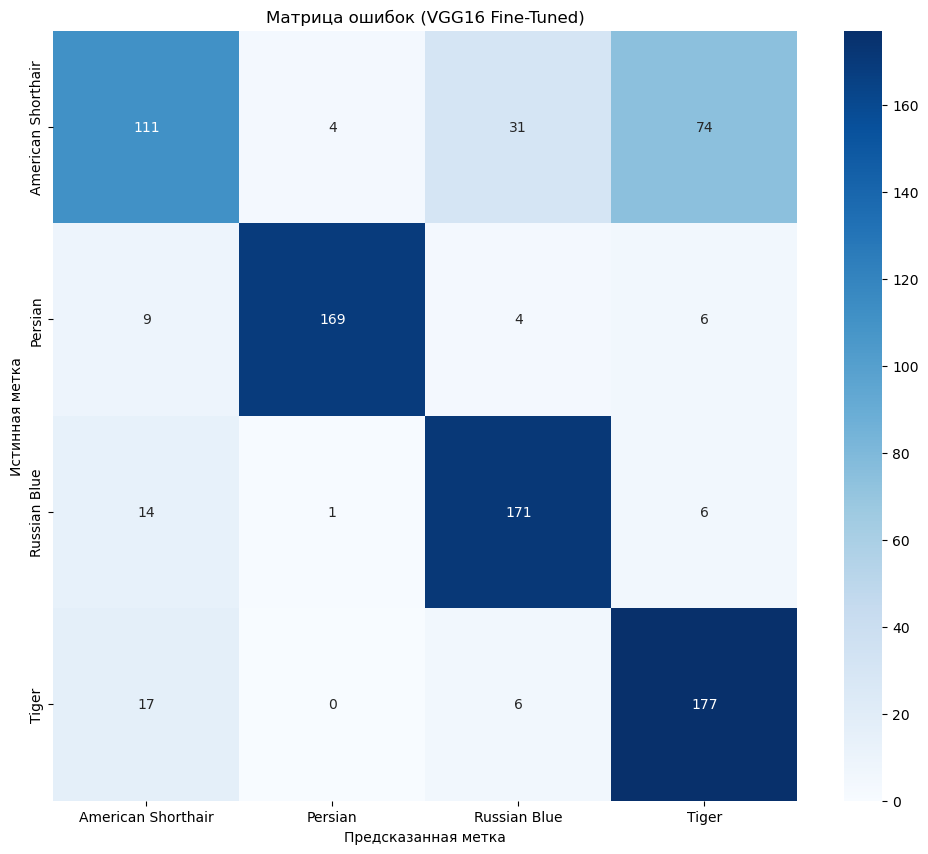

In [33]:
def make_confusion_matrix_multi_class(loader, model, class_names, device):
    with torch.inference_mode():
        predictions = []
        true_labels = []
        
        for images, labels in tqdm(loader, desc="Calculating Confusion Matrix"):
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.numpy())

    cm = metrics.confusion_matrix(true_labels, predictions)
    
    plt.figure(figsize=(12, 10)) 
    sns.heatmap(cm, 
                annot=True,    
                fmt='d',       
                cmap='Blues', 
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Предсказанная метка')
    plt.ylabel('Истинная метка')
    plt.title('Матрица ошибок (VGG16 Fine-Tuned)')
    plt.show()
make_confusion_matrix_multi_class(test_loader, model, full_dataset_raw.classes, device)

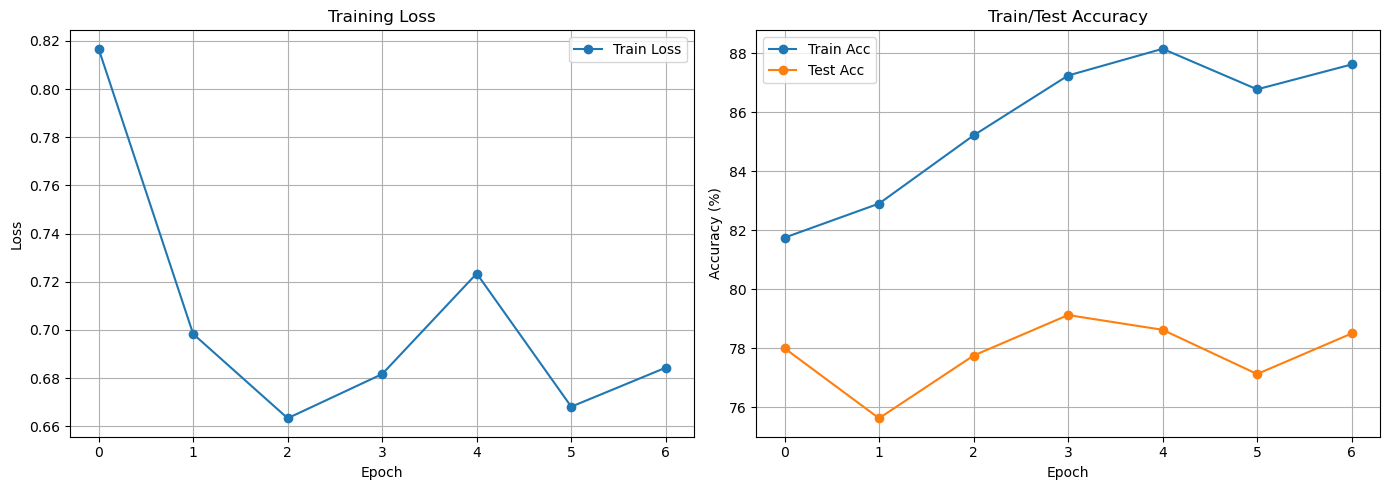

In [34]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, marker='o', label='Train Acc')
plt.plot(test_accs, marker='o', label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train/Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

In [35]:
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

In [36]:
for i, param in enumerate(model.features.parameters()):
    param.requires_grad = (i >= 24)

In [37]:
for param in model.classifier.parameters():
    param.requires_grad = True

In [38]:
in_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(in_features, num_classes)
model = model.to(device)

In [39]:
print("Настраиваемых параметров:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Настраиваемых параметров: 121922052


In [40]:
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)
num_epochs = 7
train_losses, train_accs, test_accs = [], [], []

In [41]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Unfreeze Last Block: {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    train_accs.append(accuracy(model, train_loader))
    test_accs.append(accuracy(model, test_loader))
    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Train Acc={train_accs[-1]:.2f}%, Test Acc={test_accs[-1]:.2f}%")

Unfreeze Last Block: 1/7: 100%|███████████████| 100/100 [05:32<00:00,  3.32s/it]


Epoch 1: Loss=0.6174, Train Acc=91.22%, Test Acc=80.75%


Unfreeze Last Block: 2/7: 100%|███████████████| 100/100 [05:45<00:00,  3.46s/it]


Epoch 2: Loss=0.3041, Train Acc=96.44%, Test Acc=81.00%


Unfreeze Last Block: 3/7: 100%|███████████████| 100/100 [05:34<00:00,  3.35s/it]


Epoch 3: Loss=0.1307, Train Acc=99.69%, Test Acc=80.12%


Unfreeze Last Block: 4/7: 100%|███████████████| 100/100 [05:45<00:00,  3.46s/it]


Epoch 4: Loss=0.0317, Train Acc=100.00%, Test Acc=80.38%


Unfreeze Last Block: 5/7: 100%|███████████████| 100/100 [05:31<00:00,  3.31s/it]


Epoch 5: Loss=0.0120, Train Acc=99.81%, Test Acc=81.75%


Unfreeze Last Block: 6/7: 100%|███████████████| 100/100 [04:24<00:00,  2.65s/it]


Epoch 6: Loss=0.0086, Train Acc=99.97%, Test Acc=78.38%


Unfreeze Last Block: 7/7: 100%|███████████████| 100/100 [05:12<00:00,  3.12s/it]


Epoch 7: Loss=0.0315, Train Acc=99.84%, Test Acc=78.25%


In [42]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [43]:
model_save_path_vgg_unfrozen = "vgg16_unfrozen_last_block.pth"

torch.save(model.state_dict(), model_save_path_vgg_unfrozen)
print(f"Веса модели VGG16 (с размороженным блоком) сохранены в файл: {model_save_path_vgg_unfrozen}")


Веса модели VGG16 (с размороженным блоком) сохранены в файл: vgg16_unfrozen_last_block.pth


Calculating Confusion Matrix: 100%|█████████████| 25/25 [01:11<00:00,  2.84s/it]


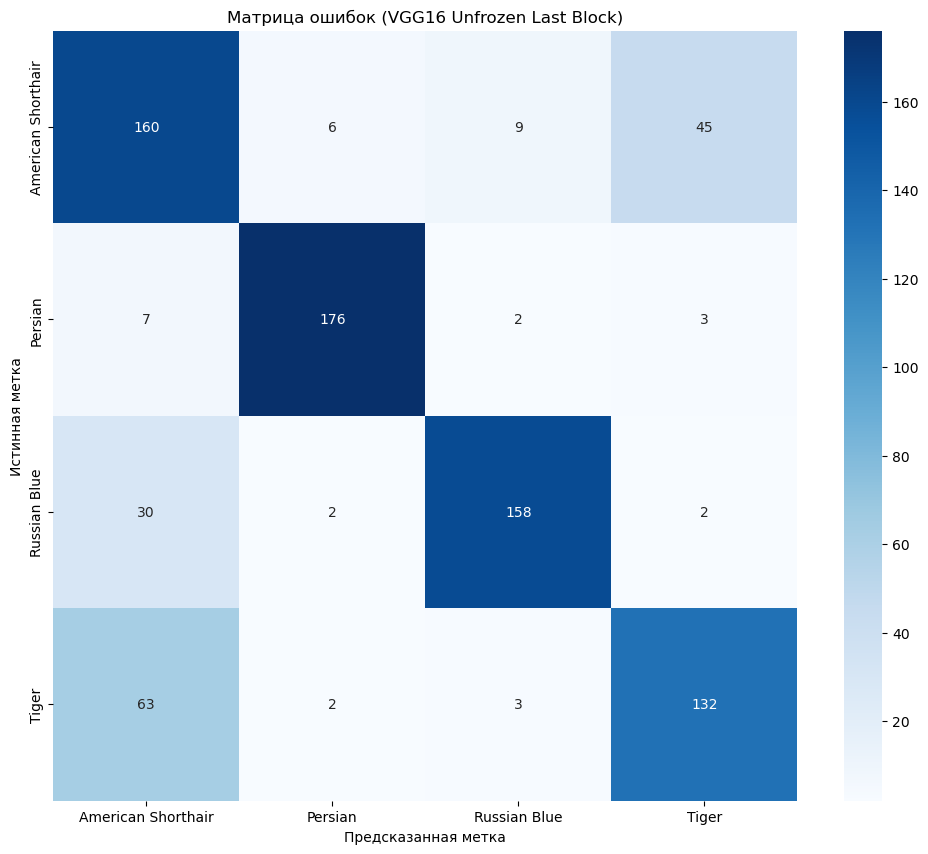

In [44]:
def make_confusion_matrix_multi_class(loader, model, class_names, device):
    with torch.inference_mode():
        predictions = []
        true_labels = []
        
        for images, labels in tqdm(loader, desc="Calculating Confusion Matrix"):
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.numpy())

    cm = metrics.confusion_matrix(true_labels, predictions)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, 
                annot=True,    
                fmt='d',       
                cmap='Blues', 
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Предсказанная метка')
    plt.ylabel('Истинная метка')
    plt.title('Матрица ошибок (VGG16 Unfrozen Last Block)')
    plt.show()
make_confusion_matrix_multi_class(test_loader, model, full_dataset_raw.classes, device)

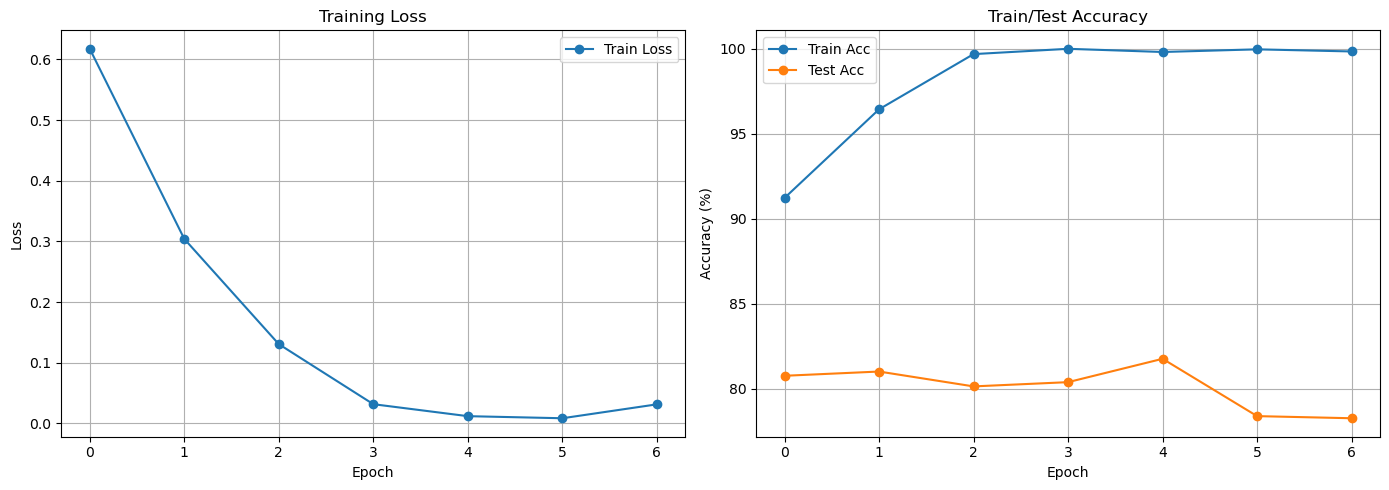

In [45]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, marker='o', label='Train Acc')
plt.plot(test_accs, marker='o', label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train/Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Повторите решение задачи 3, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

In [46]:
from torchvision import transforms
from torch.utils.data import DataLoader

In [47]:
aug_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.RandomAffine(0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [48]:
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [49]:
train_dataset_aug = SubsetWithTransform(train_subset, transform=aug_transform)
test_dataset_val = SubsetWithTransform(test_subset, transform=val_transform)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)
test_loader_val = DataLoader(test_dataset_val, batch_size=32, shuffle=False)

NameError: name 'train_subset' is not defined

In [ ]:
model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

In [ ]:
for i, param in enumerate(model.features.parameters()):
    param.requires_grad = (i >= 20)
for param in model.classifier.parameters():
    param.requires_grad = True

In [ ]:
in_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(in_features, num_classes)
model = model.to(device)

In [ ]:
print("Настраиваемых параметров:", sum(p.numel() for p in model.parameters() if p.requires_grad))

In [ ]:
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)
num_epochs = 7
train_losses, train_accs, test_accs = [], [], []

In [ ]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader_aug, desc=f"Augment: {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader_aug)
    train_losses.append(avg_loss)
    train_accs.append(accuracy(model, train_loader_aug))
    test_accs.append(accuracy(model, test_loader_val))
    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Train Acc={train_accs[-1]:.2f}%, Test Acc={test_accs[-1]:.2f}%")

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
model_save_path_final = "vgg16_final_with_augmentation.pth"

torch.save(model.state_dict(), model_save_path_final)
print(f"Финальные веса модели VGG16 (с аугментацией) сохранены в файл: {model_save_path_final}")

In [ ]:
def make_confusion_matrix_multi_class(loader, model, class_names, device):
    with torch.inference_mode():
        predictions = []
        true_labels = []
        
        for images, labels in tqdm(loader, desc="Calculating Confusion Matrix"):
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.numpy())

    cm = metrics.confusion_matrix(true_labels, predictions)
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, 
                annot=True,    
                fmt='d',       
                cmap='Blues', 
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Предсказанная метка')
    plt.ylabel('Истинная метка')
    plt.title('Матрица ошибок (VGG16 с аугментацией)')
    plt.show()
make_confusion_matrix_multi_class(test_loader_val, model, full_dataset_raw.classes, device)

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, marker='o', label='Train Acc')
plt.plot(test_accs, marker='o', label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train/Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению